In [8]:
import sys 
sys.path.append("/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs")
from tools import functions_readfiles as readfiles
from tools import functions
from tools import functions_importing_observations as importObservations

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

In [2]:
galaxy_name = "m12i_res7100_md"
galaxy_type = "zoom_in"
redshift = "0.0"
inclination = "90"

base_fdir = "/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs/skirt/runs_hden_radius/zoom_in/z0.0/m12i_res7100_md"

e6sed = readfiles.read_skirt_sed_file(
    galaxy_name = galaxy_name, 
    galaxy_type = galaxy_type, 
    redshift = redshift, 
    directory_name = "voronoi_1e6", 
    inclination = inclination
)

e5sed = readfiles.read_skirt_sed_file(
    galaxy_name = galaxy_name, 
    galaxy_type = galaxy_type, 
    redshift = redshift, 
    directory_name = "voronoi_1e5", 
    inclination = inclination
)

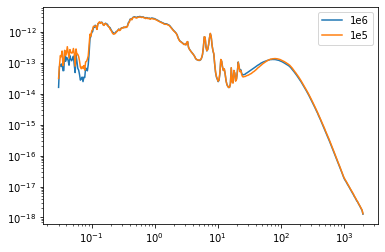

In [3]:
plt.plot(e6sed['wavelength'], e6sed['total_flux'], label="1e6")
plt.plot(e5sed['wavelength'], e5sed['total_flux'], label="1e5")

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.show()

In [4]:
# Calculate the Lir
#### Calculate infrared luminosity from sed data 
# Define the bands 
bands = {
    "all": {
        "min_wavelength": 1e-6,
        "max_wavelength": 1e6,    
    },
    "fir": {
        "min_wavelength": 3,
        "max_wavelength": 1000,
    }
}    

## SED
distance = 10 # Mpc 

####### ir
L_fir_1e6 = functions.calculate_luminosity_from_sed(
    sed = e6sed, 
    min_wavelength = bands['fir']['min_wavelength'], 
    max_wavelenght = bands['fir']['max_wavelength'], 
    distance_in_Mpc = distance
) # erg / s


L_fir_1e5 = functions.calculate_luminosity_from_sed(
    sed = e5sed, 
    min_wavelength = bands['fir']['min_wavelength'], 
    max_wavelenght = bands['fir']['max_wavelength'], 
    distance_in_Mpc = distance
) # erg / s


####### all
L_skirt_all_1e6 = functions.calculate_luminosity_from_sed(
    sed = e6sed, 
    min_wavelength = bands['all']['min_wavelength'], 
    max_wavelenght = bands['all']['max_wavelength'], 
    distance_in_Mpc = distance
) # erg / s    

L_skirt_all_1e5 = functions.calculate_luminosity_from_sed(
    sed = e5sed, 
    min_wavelength = bands['all']['min_wavelength'], 
    max_wavelenght = bands['all']['max_wavelength'], 
    distance_in_Mpc = distance
) # erg / s  


In [5]:
print(f"1e6: Lir = {L_fir_1e6} Lall = {L_skirt_all_1e6}")
print(f"1e5: Lir = {L_fir_1e5} Lall = {L_skirt_all_1e5}")


1e6: Lir = 2.2799986776916124e+44 Lall = 2.8346817890887027e+44
1e5: Lir = 2.365045767987343e+44 Lall = 2.9048754144000885e+44


# Line Luminosities  

In [7]:
file_name = "L_line_averageSobolevH_linearNDInterpolator_intensity2Luminosity.txt"

e5_gas, lines = readfiles.read_interpolated_Lline(
    galaxy_name = galaxy_name, 
    galaxy_type = galaxy_type, 
    redshift = redshift, 
    directory_name = "voronoi_1e5", 
    file_name = file_name
)

e6_gas, lines = readfiles.read_interpolated_Lline(
    galaxy_name = galaxy_name, 
    galaxy_type = galaxy_type, 
    redshift = redshift, 
    directory_name = "voronoi_1e6", 
    file_name = file_name
)


In [9]:
XCOLDGASS_df, PHIBBS2_df, ALMA_df, Leroy_df = importObservations.read_CO_observations()

I am in the function XCold_Gass_data_reading
I am in the function PHIBSS2_data_reading
I am in the function ALMA_2019_Data_Reading
I am in the function Leroy_data_reading
average_radius_r25_times_075_LEROY:  8.886206896551723


In [13]:
e5_gas.keys()

Index(['x', 'y', 'z', 'smoothing_length', 'mass', 'metallicity', 'temperature',
       'vx', 'vy', 'vz', 'hden', 'radius', 'sfr', 'turbulence', 'density',
       'mu_theoretical', 'average_sobolev_smoothingLength', 'index', 'isrf',
       'L_ly_alpha', 'L_h_alpha', 'L_h_beta', 'L_co_10', 'L_co_21', 'L_co_32',
       'L_co_43', 'L_co_54', 'L_co_65', 'L_co_76', 'L_co_87', 'L_13co', 'L_c2',
       'L_o3_88', 'L_o3_5006', 'L_o3_4958'],
      dtype='object')

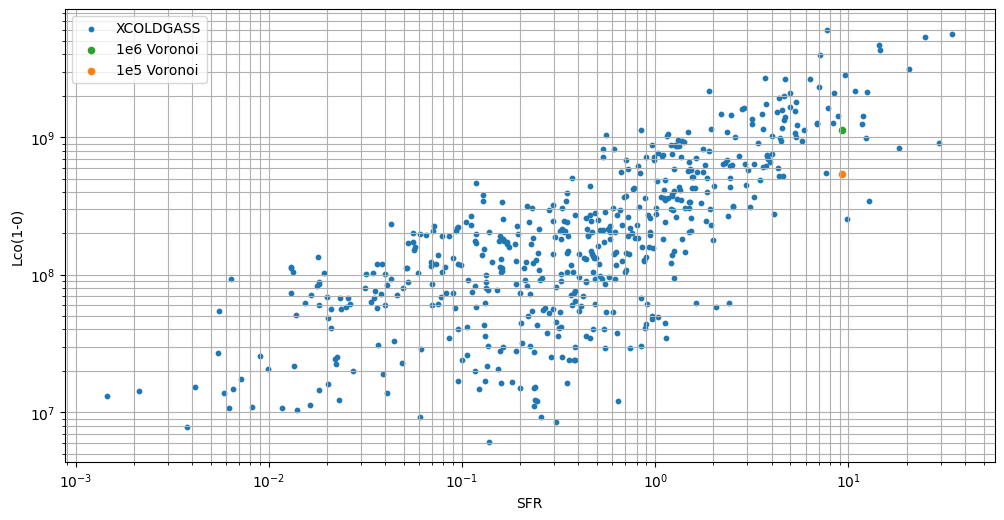

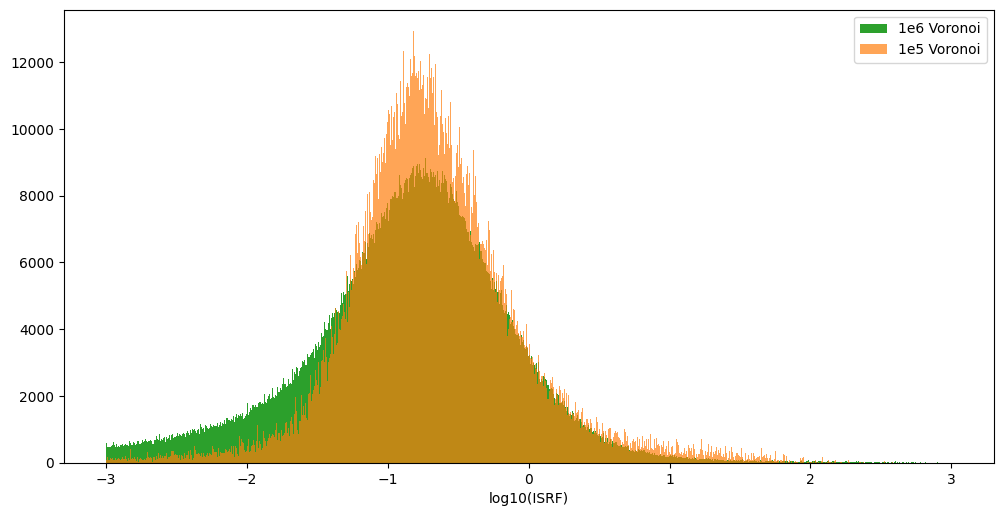

In [34]:
fig = plt.figure(figsize=(12,6), dpi=100)

plt.scatter(
    XCOLDGASS_df['SFR'],
    XCOLDGASS_df['Lco'],
    label = "XCOLDGASS",
    s = 10,
)
plt.scatter(
    sum(e6_gas['sfr']),
    sum(e6_gas['L_co_10']),
    label="1e6 Voronoi",
    c = "Tab:Green",
    s = 20,
)
plt.scatter(
    sum(e5_gas['sfr']),
    sum(e5_gas['L_co_10']),
    label="1e5 Voronoi",
    c = "Tab:Orange",    
    s = 20,
)


plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Lco(1-0)")
plt.xlabel("SFR")
plt.grid(True, which="both")
plt.show()


####

fig = plt.figure(figsize=(12,6), dpi=100)
bins = np.linspace(-3, 3, 1000)
plt.hist(np.log10(e6_gas['isrf']), bins=bins, label="1e6 Voronoi", color="Tab:Green")
plt.hist(np.log10(e5_gas['isrf']), bins=bins, label="1e5 Voronoi", color="Tab:Orange", alpha=0.7)
plt.xlabel("log10(ISRF)")
plt.legend()
plt.show()